In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
select_study = 'wall'
path2files = './output/'
intensity_list = np.linspace(0, 5e10, 5)
Qx_frac, Qy_frac = 0.13, 0.18

### Load pickle files

In [105]:
Qx_simulation = pickle.load(open(f'{path2files}/{select_study}/Qx_coherent_vs_Intensity_6D_ayy0.0_wakesON_QpyQpx0_{select_study}.pkl', 'rb'))
Qy_simulation = pickle.load(open(f'{path2files}/{select_study}/Qy_coherent_vs_Intensity_6D_ayy0.0_wakesON_QpyQpx0_{select_study}.pkl', 'rb'))
DQx_chao = pickle.load(open(f'{path2files}/{select_study}/Qx_coherent_vs_Intensity_Chao_QpyQpx0.0_{select_study}.pkl', 'rb'))
DQy_chao = pickle.load(open(f'{path2files}/{select_study}/Qy_coherent_vs_Intensity_Chao_QpyQpx0.0_{select_study}.pkl', 'rb'))

### Create lists for easier plotting

In [106]:
Qx_simulation_list, Qy_simulation_list = [], []
DQx_chao_list, DQy_chao_list  = [], []

for intensity in intensity_list:
    Qx_simulation_list.append(Qx_simulation[f'intensity {intensity}'])
    Qy_simulation_list.append(Qy_simulation[f'intensity {intensity}'])
    DQy_chao_list.append(DQy_chao[f'intensity {intensity}'])
    DQx_chao_list.append(DQx_chao[f'intensity {intensity}'])

In [107]:
list(np.array(Qy_simulation_list)-0.18)[-1]*1e4

-0.8787813936672606

In [108]:
DQy_chao_list[-1]*1e4

-1.516635144967184

### Plotting

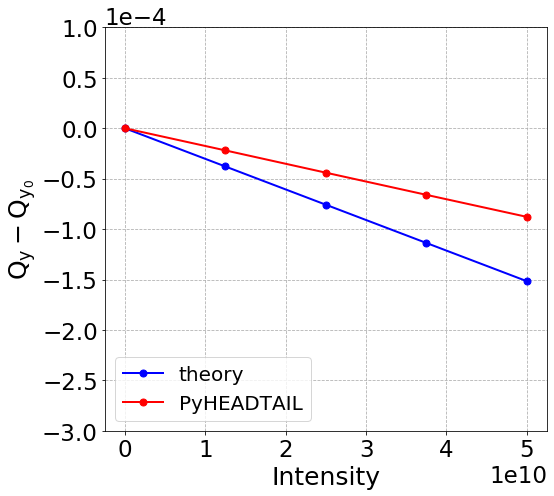

In [109]:
plt.plot(intensity_list, DQy_chao_list, '-o', c='b', label='theory')
plt.plot(intensity_list, np.array(Qy_simulation_list)-Qy_frac, '-o', c='r', label='PyHEADTAIL')
    

plt.ylabel(r'$\mathrm{Q_y-Q_{y_0}}$')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Intensity')
plt.grid(linestyle='dashed')
plt.legend(loc=3)

plt.tight_layout()

# axis limits
plt.ylim(-7e-4, 3e-4)

plt.ylim(-3e-4, 1e-4) # for zoom

savefig = False
if savefig:
    plt.savefig(f'DQy_vs_Intensity_Q26wakes_QpxQpy_{select_study}_zoom.png', bbox_inches='tight')

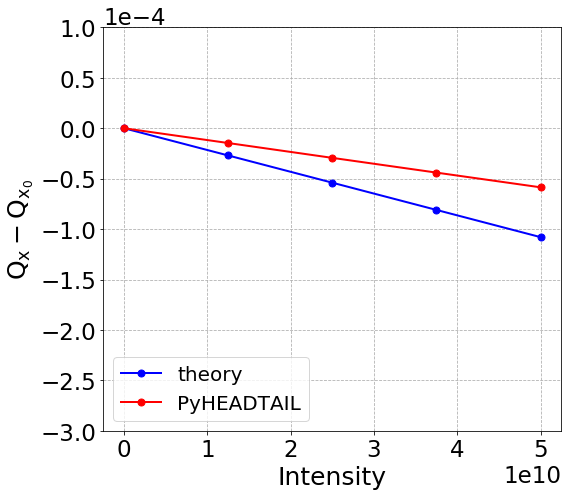

In [112]:
plt.plot(intensity_list, DQx_chao_list, '-o', c='b', label='theory')
plt.plot(intensity_list, np.array(Qx_simulation_list)-Qx_frac, '-o', c='r', label='PyHEADTAIL')
    

plt.ylabel(r'$\mathrm{Q_x-Q_{x_0}}$')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Intensity')
plt.grid(linestyle='dashed')
plt.legend(loc=3)

plt.tight_layout()

# axis limits
plt.ylim(-7e-4, 3e-4)

plt.ylim(-3e-4, 1e-4) # for zoom

savefig = False
if savefig:
    plt.savefig(f'DQx_vs_Intensity_Q26wakes_{select_study}.png', bbox_inches='tight')